# Gender Voice Prediction Project

In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
import mglearn

In [2]:
# Import the dataset
gen_data=pd.read_csv('voice.csv')

In [3]:
gen_data.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [4]:
#Check the null values presene in the dataset.
gen_data.isnull().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

In [5]:
# To extract total count, min, max & so on...
gen_data.describe()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000
mean,0.180907,0.057126,0.185621,0.140456,0.224765,0.084309,3.140168,36.568461,0.895127,0.408216,0.165282,0.180907,0.142807,0.036802,0.258842,0.829211,0.052647,5.047277,4.994630,0.173752
std,0.029918,0.016652,0.036360,0.048680,0.023639,0.042783,4.240529,134.928661,0.044980,0.177521,0.077203,0.029918,0.032304,0.019220,0.030077,0.525205,0.063299,3.521157,3.520039,0.119454
min,0.039363,0.018363,0.010975,0.000229,0.042946,0.014558,0.141735,2.068455,0.738651,0.036876,0.000000,0.039363,0.055565,0.009775,0.103093,0.007812,0.004883,0.007812,0.000000,0.000000
25%,0.163662,0.041954,0.169593,0.111087,0.208747,0.042560,1.649569,5.669547,0.861811,0.258041,0.118016,0.163662,0.116998,0.018223,0.253968,0.419828,0.007812,2.070312,2.044922,0.099766
50%,0.184838,0.059155,0.190032,0.140286,0.225684,0.094280,2.197101,8.318463,0.901767,0.396335,0.186599,0.184838,0.140519,0.046110,0.271186,0.765795,0.023438,4.992188,4.945312,0.139357
75%,0.199146,0.067020,0.210618,0.175939,0.243660,0.114175,2.931694,13.648905,0.928713,0.533676,0.221104,0.199146,0.169581,0.047904,0.277457,1.177166,0.070312,7.007812,6.992188,0.209183
max,0.251124,0.115273,0.261224,0.247347,0.273469,0.252225,34.725453,1309.612887,0.981997,0.842936,0.280000,0.251124,0.237636,0.204082,0.279114,2.957682,0.458984,21.867188,21.843750,0.932374


<AxesSubplot:>

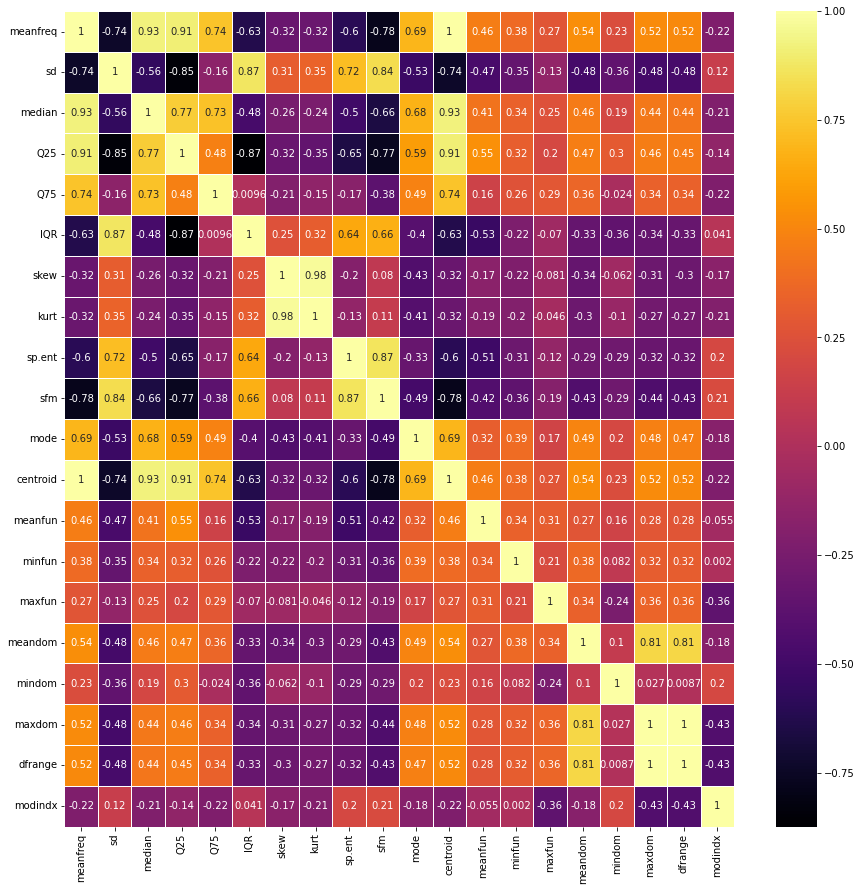

In [6]:
# Generate Heat Map
plt.figure(figsize=(15,15))
sns.heatmap(gen_data.corr(),annot=True,cmap='inferno',linewidth=0.5)

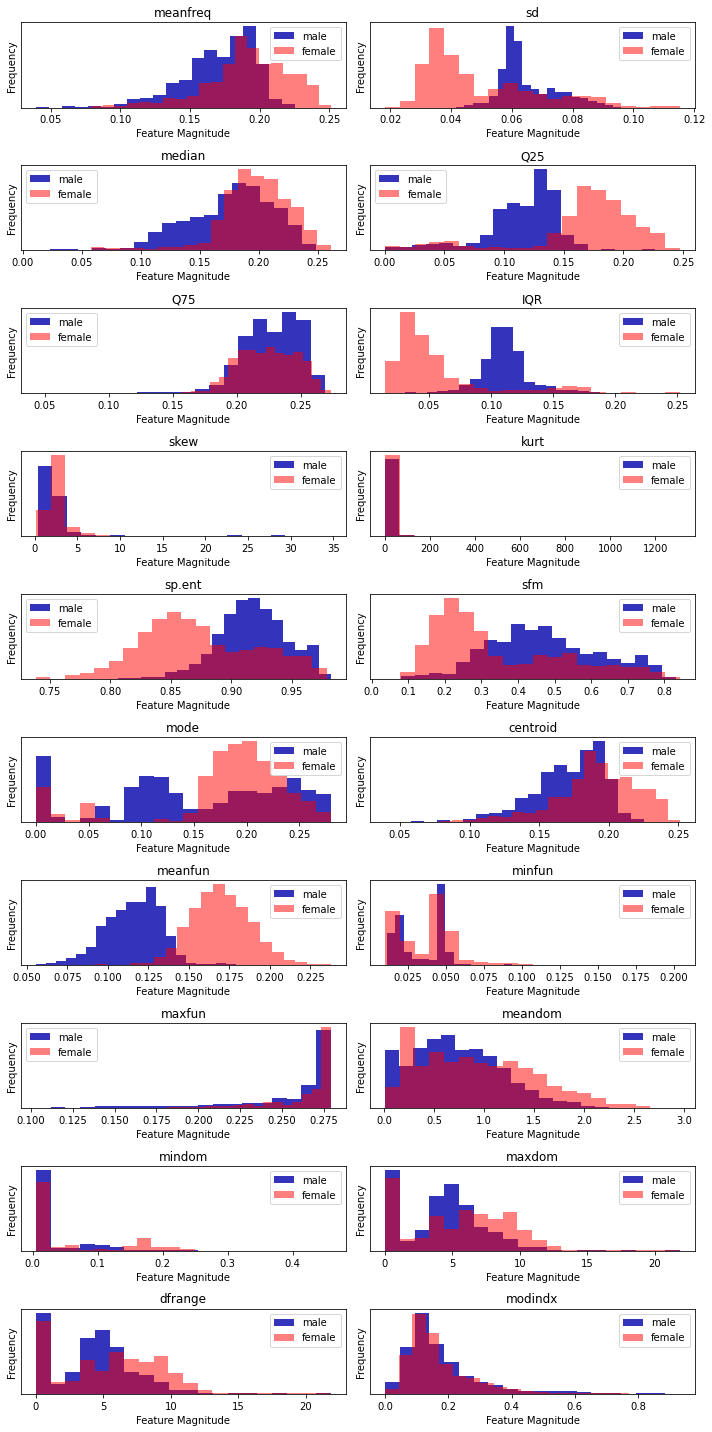

In [7]:
# PLot the Histograms
male=gen_data.loc[gen_data['label']=='male']
female=gen_data.loc[gen_data['label']=='female']
fig, axes = plt.subplots(10,2,figsize=(10,20))
ax = axes.ravel()
for i in range(20):
    ax[i].hist(male.iloc[:,i],bins=20,color=mglearn.cm3(0),alpha=0.8)
    ax[i].hist(female.iloc[:,i],bins=20,color='red',alpha=0.5)
    ax[i].set_title(list(male)[i])
    ax[i].set_yticks(())
    ax[i].set_xlabel("Feature Magnitude")
    ax[i].set_ylabel("Frequency")
    ax[i].legend(["male","female"],loc="best")
fig.tight_layout()

In [8]:
# drop the unwanted columns
gen_new=gen_data.drop(['skew','kurt','minfun','maxfun','mindom'],axis=1)

In [9]:
gen_new.columns

Index(['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'sp.ent', 'sfm',
       'mode', 'centroid', 'meanfun', 'meandom', 'maxdom', 'dfrange',
       'modindx', 'label'],
      dtype='object')

In [10]:
# Define X & y variables.
X = gen_new.drop(['label'],axis=1)
y = gen_new['label']

In [11]:
# Split the data into train & test
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,test_size=0.2)

In [12]:
# Bulid the model using Random Forest Classifier & fit it on Xtrain & ytrain 
forest = RandomForestClassifier(n_estimators=500, random_state=101).fit(Xtrain,ytrain)
print("Random Forest")
print("Accuracy on Training Set: {:.2f}".format(forest.score(Xtrain,ytrain)))
print("Accuracy on Test Set: {:.2f}".format(forest.score(Xtest,ytest)))

Random Forest
Accuracy on Training Set: 1.00
Accuracy on Test Set: 0.98


In [15]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred = forest.predict(Xtest)
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

      female       0.98      0.99      0.98       323
        male       0.99      0.98      0.98       311

    accuracy                           0.98       634
   macro avg       0.98      0.98      0.98       634
weighted avg       0.98      0.98      0.98       634



# Conclusion:
The gender voice prediction project successfully employed machine learning technique to accurately predict gender based on voice features. By analyzing and processing vocal characteristics, the model achieved commendable performance, showcasing its potential for real-world applications such as speech recognition systems and gender-specific services.